<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/HW14_Feature_Selection_and_PCA_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Apply all feature selection techniques and PCA separately and then apply knn classifier.
compare the results.*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/Feature selection and PCA/mobile data.csv'
df=pd.read_csv(path)
df.head(7)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Total No of per Unique value in a Column and data balance check
df['price_range'].value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

Encoding Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [ ]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1


In [ ]:
#Target
y=df['price_range']
y.value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

In [ ]:
#Features
X=df.copy()
X=df.drop('price_range', axis=1)
X.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1


# 1. Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier # Decison tree

In [ ]:
extr = ExtraTreesClassifier()

In [ ]:
extr.fit(X,y)

ExtraTreesClassifier()

In [ ]:
feature_importance = extr.feature_importances_
feature_importance #info gain

array([0.06146402, 0.0195634 , 0.0337996 , 0.01931106, 0.03326061,
       0.01748485, 0.03586394, 0.03383953, 0.03680979, 0.03370771,
       0.03453316, 0.0459363 , 0.04930875, 0.38826796, 0.03491036,
       0.03467547, 0.0349897 , 0.01427153, 0.01778394, 0.02021831])

In [ ]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Output'])
imp.head(7)

,Gain_Output
0,0.061464
1,0.019563
2,0.033800
3,0.019311
4,0.033261
5,0.017485
6,0.035864


In [ ]:
#Make the column names of X into row wise
cols = pd.DataFrame(X.columns, columns=['Feature_Names'])
cols.head(10)

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [ ]:
gains = pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Output
0,battery_power,0.061464
1,blue,0.019563
2,clock_speed,0.033800
3,dual_sim,0.019311
4,fc,0.033261
5,four_g,0.017485
6,int_memory,0.035864
7,m_dep,0.033840
8,mobile_wt,0.036810
9,n_cores,0.033708


In [ ]:
Top20 = gains.nlargest(20,'Gain_Output')


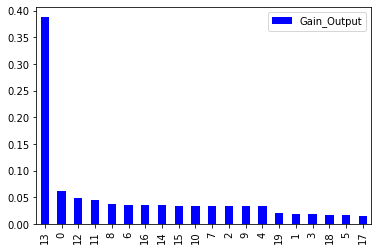

In [ ]:
Top20.plot(kind='bar',color=['Blue']) # bar mean horizontal

In [ ]:
Top12=gains.nlargest(12,'Gain_Output')
Top12

,Feature_Names,Gain_Output
13,ram,0.388268
0,battery_power,0.061464
12,px_width,0.049309
11,px_height,0.045936
8,mobile_wt,0.036810
6,int_memory,0.035864
16,talk_time,0.034990
14,sc_h,0.034910
15,sc_w,0.034675
10,pc,0.034533


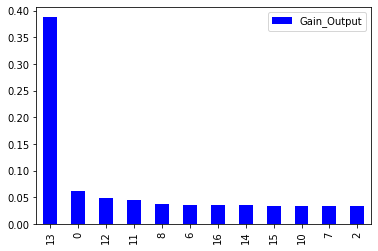

In [ ]:
Top12.plot(kind='bar',color=['Blue']) # bar mean horizontal

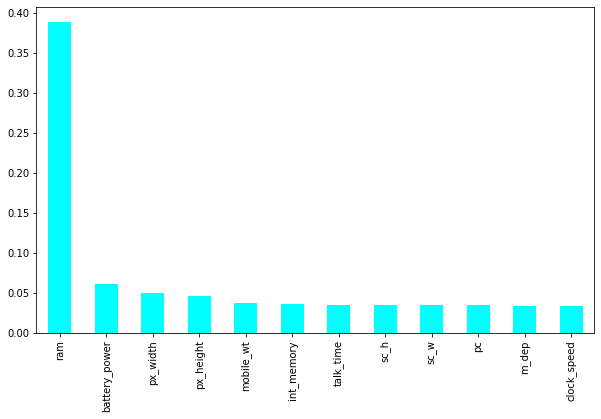

In [ ]:
features = pd.Series(extr.feature_importances_, index = X.columns)
plt.figure(figsize=(10,6))
features.nlargest(12).plot(kind='bar', color='cyan')
#plt.savefig('score1.png')

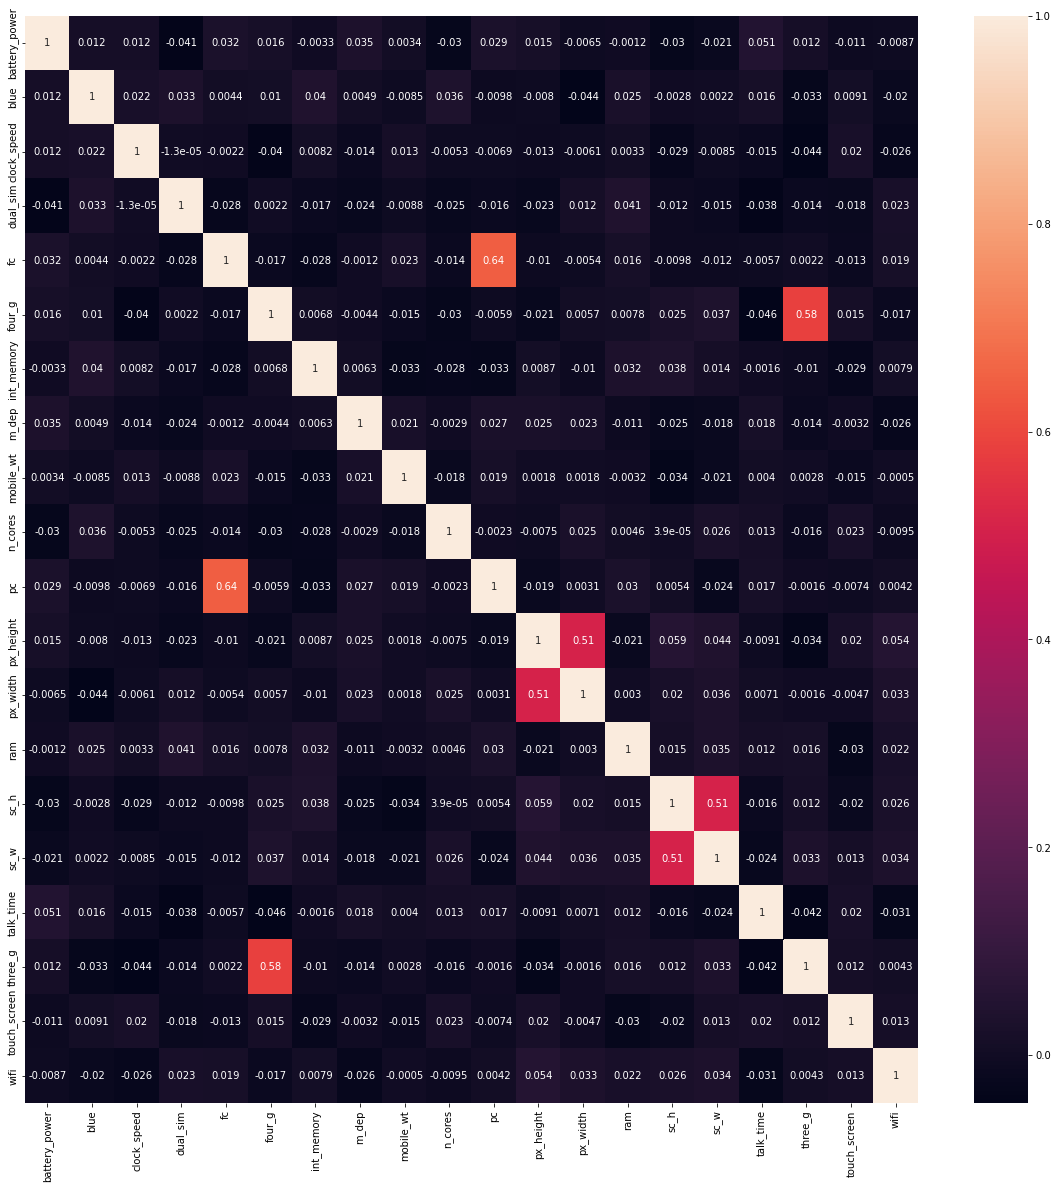

In [ ]:
feature_names = X.columns #features name
colname = X.corr().index #features name
plt.figure(figsize=(20,20))
sns.heatmap(df[colname].corr(),annot=True)

#2. SELECT K- Best

In [ ]:
Xkbest = X.copy()
ykbest = y.copy()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression #chi2 only when features are non negative

In [ ]:
kbest = SelectKBest(score_func=f_classif)

In [ ]:
feature_value = kbest.fit(Xkbest,ykbest)

In [ ]:
cols = pd.DataFrame(feature_value.scores_ , columns=['Feature_Values'])
cols.head(27)

,Feature_Values
0,31.190873
1,0.459678
2,0.613019
3,0.489493
4,0.830396
5,1.167108
6,2.965758
7,1.644102
8,3.625213
9,2.582847


In [ ]:
feature_value.scores_

array([3.11908732e+01, 4.59678478e-01, 6.13019154e-01, 4.89492949e-01,
       8.30396133e-01, 1.16710790e+00, 2.96575777e+00, 1.64410175e+00,
       3.62521255e+00, 2.58284723e+00, 8.74295515e-01, 1.95473713e+01,
       2.25200970e+01, 3.52623236e+03, 2.20350431e+00, 1.59731005e+00,
       1.66657575e+00, 4.39621377e-01, 1.45891088e+00, 2.61677203e-01])

In [ ]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
col2 = pd.DataFrame(X.columns, columns=['Feature_Names'])
col2.head(22)

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [ ]:
scores_value = pd.concat([col2,cols],axis=1)
scores_value

,Feature_Names,Feature_Values
0,battery_power,31.190873
1,blue,0.459678
2,clock_speed,0.613019
3,dual_sim,0.489493
4,fc,0.830396
5,four_g,1.167108
6,int_memory,2.965758
7,m_dep,1.644102
8,mobile_wt,3.625213
9,n_cores,2.582847


In [ ]:
Xkbest1 = scores_value.nlargest(20,'Feature_Values')
Xkbest1 

,Feature_Names,Feature_Values
13,ram,3526.232362
0,battery_power,31.190873
12,px_width,22.520097
11,px_height,19.547371
8,mobile_wt,3.625213
6,int_memory,2.965758
9,n_cores,2.582847
14,sc_h,2.203504
16,talk_time,1.666576
7,m_dep,1.644102


# 3. Priciple Component Analysis (PCA)

In [ ]:
df1=df.copy()
df1.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1


In [ ]:
#Target
y_p = df1['price_range']
y_p.shape

(2000,)

In [ ]:
y_p.unique()

array([3, 1, 2, 0])

In [ ]:
#Features
X_p=df1.copy()
X_p=df1.drop(['price_range'], axis=1)
X_p.shape

(2000, 20)

**Feature Scaling MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
mms = MinMaxScaler() #feature_range=(2,5)

In [ ]:
X_psc= mms.fit_transform(X_p)
X_psc

array([[0.18102872, 0.        , 0.24      , ..., 1.        , 1.        ,
        0.        ],
       [0.80694723, 1.        , 0.64      , ..., 1.        , 0.        ,
        0.        ],
       [0.96726787, 0.        , 0.84      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_psc)

In [ ]:
X_pca

array([[ 0.21013682,  0.09365927, -0.00939606],
       [ 0.28964244, -0.00931825,  0.80472548],
       [ 0.93142056, -0.12108688, -0.69991195],
       ...,
       [-0.56819056,  0.03089002,  0.06931789],
       [-0.56440374,  0.76750206, -0.43332802],
       [-0.51460336, -0.65430398, -0.38176906]])

In [ ]:
X_pca.shape

(2000, 3)

In [ ]:
#New Features after PCA (reducing the no of cols)
features = pd.DataFrame(X_pca, columns=['pca1','pca','pca3'])
features

,pca1,pca,pca3
0,0.210137,0.093659,-0.009396
1,0.289642,-0.009318,0.804725
2,0.931421,-0.121087,-0.699912
3,0.301120,-0.012146,0.770595
4,-0.542869,0.172006,0.817067
...,...,...,...
1995,-0.523498,-0.547916,0.462669
1996,0.293865,-0.560989,-0.381690
1997,-0.568191,0.030890,0.069318
1998,-0.564404,0.767502,-0.433328


In [ ]:
import plotly.express as pl

pl.scatter_3d(features, x='pca1',y='pca',z='pca3', color='pca1')

#1. KNN ML MODEL with Extra Tree Classifier

In [ ]:
X.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
Top20

,Feature_Names,Gain_Output
13,ram,0.388268
0,battery_power,0.061464
12,px_width,0.049309
11,px_height,0.045936
8,mobile_wt,0.036810
6,int_memory,0.035864
16,talk_time,0.034990
14,sc_h,0.034910
15,sc_w,0.034675
10,pc,0.034533


In [ ]:
Xfk=X.drop(['n_cores','m_dep','blue',	'wifi', 'dual_sim',	'touch_screen',	'four_g',	'three_g'], axis=1)

In [ ]:
Xfk.head(3)

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,772,1.1,12,39,81,14,1314,1854,2819,17,15,3
1,1709,2.1,1,13,156,2,974,1385,3283,17,1,15
2,1949,2.6,4,47,199,7,407,822,1433,11,5,20


In [ ]:
Xfk.shape

(2000, 12)

In [ ]:
yfk=y.copy()

In [ ]:
yfk.head(3)

0    3
1    3
2    1
Name: price_range, dtype: int64

In [ ]:
yfk.shape

(2000,)

**Splitting in Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
Xfk_train, Xfk_test, yfk_train, yfk_test=train_test_split(Xfk,yfk, test_size=0.3, random_state=42)

In [ ]:
yfk_train.count()

1400

In [ ]:
yfk_test.count()

600

**KNN Model Creation**

In [ ]:
yfk.nunique()

4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc_fk = KNeighborsClassifier(n_neighbors=4)
knc_fk.fit(Xfk_train,yfk_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
yfk_pred = knc_fk.predict(Xfk_test)

In [ ]:
#Accuracy Check
knc_fk.score(Xfk_test , yfk_test)

0.9066666666666666

#Optimization with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
knc_fk_grid = GridSearchCV(knc_fk, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
knc_fk_grid.fit(Xfk_train,yfk_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
yfk_pred_grid = knc_fk_grid.predict(Xfk_test)

In [ ]:
yfk_pred_grid

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 1, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 1, 3, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [ ]:
#Accuracy Check
knc_fk_grid.score(Xfk_test , yfk_test)

0.9283333333333333

#Optimization with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = dict(n_neighbors=k_range)
knc_fk_rand = RandomizedSearchCV(knc_fk, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
knc_fk_rand .fit(Xfk_train, yfk_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=4),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   random_state=5, scoring='accuracy')

In [ ]:
yfk_pred_grid = knc_fk_grid.predict(Xfk_test)
yfk_pred_grid

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 1, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 2, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 1, 3, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [ ]:
#Accuracy Check
knc_fk_rand.score(Xfk_test , yfk_test)

0.93

#K Fold Cross Validation 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold_kncfk = KFold(n_splits=5) #each fold contain 20% data
result_kfold_kncfk = cross_val_score(knc_fk_rand, Xfk, yfk,cv=kfold_kncfk) 

In [ ]:
result_kfold_kncfk

array([0.9425, 0.9375, 0.93  , 0.9125, 0.92  ])

In [ ]:
result_kfold_kncfk.max()

0.9425

# 2. KNN Model Creation with Select K-Best

In [ ]:
Xkbest1.shape

(20, 2)

In [ ]:
Xkbest_new = X.drop(['four_g','pc', 'fc', 'clock_speed', 'dual_sim', 'blue', 'three_g','wifi'], axis=1)

In [ ]:
Xkbest_new.shape

(2000, 12)

In [ ]:
ykbest_new=ykbest.copy()

In [ ]:
ykbest_new.shape

(2000,)

In [ ]:
from sklearn.model_selection import train_test_split
Xkbest_new_train, Xkbest_new_test, ykbest_new_train, ykbest_new_test=train_test_split(Xkbest_new,ykbest_new, test_size=0.3, random_state=42)

In [ ]:
ykbest_new_train.count()

1400

In [ ]:
ykbest_new_test.count()

600

In [ ]:
ykbest_new.nunique()

4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc_kbest = KNeighborsClassifier(n_neighbors=4)
knc_kbest.fit(Xkbest_new_train,ykbest_new_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
ykbest_new_pred = knc_kbest.predict(Xkbest_new_test)

In [ ]:
#Accuracy Check
knc_kbest.score(Xkbest_new_test, ykbest_new_test)

0.9066666666666666

# 3. KNN Model Creation With PCA

**Splitting in Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, y_p_train, y_p_test=train_test_split(X_pca,y_p, test_size=0.3, random_state=42)

In [ ]:
y_p_train.count()

1400

In [ ]:
X_pca_train.shape

(1400, 3)

In [ ]:
y_p_test.count()

600

In [ ]:
X_pca_test.shape

(600, 3)

In [ ]:
y_p.nunique()

4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc_pca = KNeighborsClassifier(n_neighbors=4)
knc_pca.fit(X_pca_train,y_p_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_p_pred = knc_pca.predict(X_pca_test)

In [ ]:
#Accuracy Check
knc_pca.score(X_pca_test , y_p_test)

0.31333333333333335

**Accuracy Table**

In [ ]:
a1 = 'Accuracy of KNN with ExtraTree_holdout'
a2 = 'Accuracy of KNN with ExtraTree and GridCV_holdout'
a3 = 'Accuracy of KNN with ExtraTree and RandomCV_holdout'
a4 = 'Accuracy of KNN with ExtraTree and RandomCV_Kfold'
a5 = 'Accuracy of KNN with KBEST_holdout'
a6 = 'Accuracy of KNN with PCA_MMscal_holdout'
KNN_accuracy=pd.DataFrame([[a1,knc_fk.score(Xfk_test , yfk_test)],[a2, knc_fk_grid.score(Xfk_test , yfk_test)], 
                             [a3, knc_fk_rand.score(Xfk_test , yfk_test)], [a4,result_kfold_kncfk.max()], 
                             [a5, knc_kbest.score(Xkbest_new_test, ykbest_new_test) ], [a6, knc_pca.score(X_pca_test , y_p_test)]],
                 columns=['Accuracy', 'Value'])
KNN_accuracy

,Accuracy,Value
0,Accuracy of KNN with ExtraTree_holdout,0.906667
1,Accuracy of KNN with ExtraTree and GridCV_holdout,0.928333
2,Accuracy of KNN with ExtraTree and RandomCV_ho...,0.930000
3,Accuracy of KNN with ExtraTree and RandomCV_Kfold,0.942500
4,Accuracy of KNN with KBEST_holdout,0.906667
5,Accuracy of KNN with PCA_MMscal_holdout,0.313333


**Graphical View**

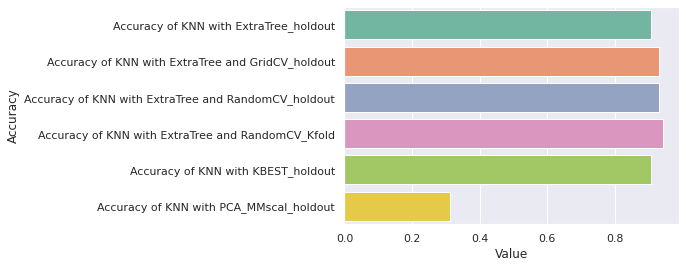

In [ ]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=KNN_accuracy, palette="Set2")
sns.set(rc={'figure.figsize':(10,5)})